# Summary Report — Loan Default Prediction

In [ ]:
# 1. Imports & Setup
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import sys

# Find ROOT
ROOT = Path.cwd().resolve().parents[0] if Path.cwd().name == "notebooks" else Path.cwd()
if str(ROOT) not in sys.path:
    sys.path.append(str(ROOT))

# 2. Load config
from src.data_loader import load_config
cfg = load_config()

# 3. Load engineered data
engineered_path = (ROOT / cfg["paths"]["processed_data_dir"] / "loan_default_engineered.csv").resolve()
df = pd.read_csv(engineered_path)

In [6]:
# 4. Load model summary
summary_path = ROOT / "reports" / "baseline_summary.csv"
summary = pd.read_csv(summary_path)
# 5. Show head of data
df.head()

,employed,bank_balance,annual_salary,DEFAULT,log_bank_balance,log_annual_salary,balance_to_salary,employed_x_log_salary
0,1,8754.36,532339.56,0,9.077421,13.185039,0.016445,13.185039
1,0,9806.16,145273.56,0,9.190868,11.886381,0.067501,0.000000
2,1,12882.60,381205.68,0,9.463710,12.851097,0.033794,12.851097
3,1,6351.00,428453.88,0,8.756525,12.967941,0.014823,12.967941
4,1,9427.92,461562.00,0,9.151537,13.042374,0.020426,13.042374


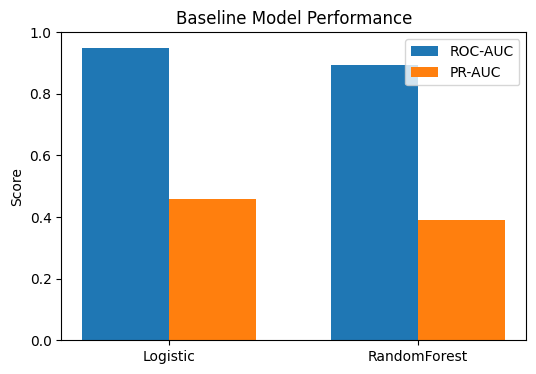

In [7]:
# 6. Plot Model Comparison
fig, ax = plt.subplots(figsize=(6, 4))
bar_width = 0.35
x = range(len(summary))
ax.bar(x, summary["roc_auc"], bar_width, label="ROC-AUC")
ax.bar([i + bar_width for i in x], summary["pr_auc"], bar_width, label="PR-AUC")
ax.set_xticks([i + bar_width / 2 for i in x])
ax.set_xticklabels(summary["model"])
ax.set_ylabel("Score")
ax.set_ylim(0, 1)
ax.set_title("Baseline Model Performance")
ax.legend()
plt.show()

## Key Findings

1. **Class Imbalance**  
   Defaults make up ~3.3% of dataset — PR-AUC is the more telling metric.

2. **Model Results**  
   - Logistic Regression: ROC-AUC 0.95, PR-AUC 0.46
   - Random Forest: ROC-AUC 0.89, PR-AUC 0.39
   Logistic Regression captured ~82% of defaults in top 10% risk predictions.

3. **Feature Impact**  
   Counterintuitive trend where higher bank balances were linked to higher default — likely needs business validation.

4. **Business Takeaway**  
   High ROC-AUC is promising, but class imbalance means a focus on **precision-recall** and **capture rates** is essential for deployment.

4. **Scoring and risk-segmentation**  

# Further Scope

- Perform threshold tuning for recall optimization.
- Explore ensemble and boosted tree methods.
- Validate data anomalies with business SMEs.
- Build KPI monitoring for post-deployment.